In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
Eczema_dir = r'/kaggle/input/skin-diseases-image-dataset/IMG_CLASSES/1. Eczema 1677'
Warts_Molluscum_and_other_Viral_Infections_dir = r'/kaggle/input/skin-diseases-image-dataset/IMG_CLASSES/10. Warts Molluscum and other Viral Infections - 2103'

Atopic_Dermatitis_dir = r'/kaggle/input/skin-diseases-image-dataset/IMG_CLASSES/3. Atopic Dermatitis - 1.25k'
Melanoma_dir = '/kaggle/input/skin-diseases-image-dataset/IMG_CLASSES/2. Melanoma 15.75k'
Psoriasis_pictures_Lichen_Planus_and_related_diseases_dir = r'/kaggle/input/skin-diseases-image-dataset/IMG_CLASSES/7. Psoriasis pictures Lichen Planus and related diseases - 2k'
Seborrheic_Keratoses_and_other_Benign_Tumors_dir = r'/kaggle/input/skin-diseases-image-dataset/IMG_CLASSES/8. Seborrheic Keratoses and other Benign Tumors - 1.8k'
Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections_dir = r'/kaggle/input/skin-diseases-image-dataset/IMG_CLASSES/9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k'
Healthy_dir = r'/kaggle/input/skin-ds/train/Healthy'

filepaths = []
labels = []
dict_list = [Eczema_dir, Warts_Molluscum_and_other_Viral_Infections_dir, Atopic_Dermatitis_dir, Melanoma_dir,Psoriasis_pictures_Lichen_Planus_and_related_diseases_dir ,Seborrheic_Keratoses_and_other_Benign_Tumors_dir ,Tinea_Ringworm_Candidiasis_and_other_Fungal_Infections_dir, Healthy_dir]
class_labels = ['Eczema', 'Warts Molluscum and other Viral Infections', 'Atopic Dermatitis','Melanoma', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors','Tinea Ringworm Candidiasis and other Fungal Infections', 'Healthy' ]

for i, j in enumerate(dict_list):
    flist = os.listdir(j)
    for f in flist:
        fpath = os.path.join(j, f)
        filepaths.append(fpath)
        labels.append(class_labels[i])

Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
skin_data = pd.concat([Fseries, Lseries], axis=1)
skin_df = pd.DataFrame(skin_data)
print(skin_df.head())
print(skin_df["labels"].value_counts())

                                           filepaths  labels
0  /kaggle/input/skin-diseases-image-dataset/IMG_...  Eczema
1  /kaggle/input/skin-diseases-image-dataset/IMG_...  Eczema
2  /kaggle/input/skin-diseases-image-dataset/IMG_...  Eczema
3  /kaggle/input/skin-diseases-image-dataset/IMG_...  Eczema
4  /kaggle/input/skin-diseases-image-dataset/IMG_...  Eczema
labels
Melanoma                                                  3140
Warts Molluscum and other Viral Infections                2103
Psoriasis pictures Lichen Planus and related diseases     2055
Seborrheic Keratoses and other Benign Tumors              1847
Tinea Ringworm Candidiasis and other Fungal Infections    1702
Eczema                                                    1677
Healthy                                                   1368
Atopic Dermatitis                                         1257
Name: count, dtype: int64


In [3]:
import os
import pandas as pd
import numpy as np
import keras
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

import sklearn.metrics as metrics
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)

In [4]:
from sklearn.model_selection import train_test_split

# Stratified split into train and test sets
train_set, val_set = train_test_split(skin_df, test_size=0.2, random_state=42, stratify=skin_df['labels'])

# Display the distribution of labels in each set to confirm stratification
print("Training set label distribution:")
print(train_set['labels'].value_counts())

print("\nValidation set label distribution:")
print(val_set['labels'].value_counts())

Training set label distribution:
labels
Melanoma                                                  2512
Warts Molluscum and other Viral Infections                1682
Psoriasis pictures Lichen Planus and related diseases     1644
Seborrheic Keratoses and other Benign Tumors              1477
Tinea Ringworm Candidiasis and other Fungal Infections    1362
Eczema                                                    1342
Healthy                                                   1094
Atopic Dermatitis                                         1006
Name: count, dtype: int64

Validation set label distribution:
labels
Melanoma                                                  628
Warts Molluscum and other Viral Infections                421
Psoriasis pictures Lichen Planus and related diseases     411
Seborrheic Keratoses and other Benign Tumors              370
Tinea Ringworm Candidiasis and other Fungal Infections    340
Eczema                                                    335
Healthy        

In [5]:
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe= train_set,x_col="filepaths",y_col="labels",
                                      target_size=(244,244),
                                      color_mode='rgb',
                                      class_mode="categorical", #used for Sequential Model
                                      batch_size=32,
                                      shuffle=False            
                                     )

val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="labels",
                                    target_size=(244,244),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=32,
                                    shuffle=False
                                   )

Found 12119 validated image filenames belonging to 8 classes.
Found 3030 validated image filenames belonging to 8 classes.


In [6]:
class_names = list(train.class_indices.keys())
print (class_names)

['Atopic Dermatitis', 'Eczema', 'Healthy', 'Melanoma', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Warts Molluscum and other Viral Infections']


In [7]:
num_classes = len(class_names)

In [8]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

# Load the MobileNetV2 model pre-trained on ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(244, 244, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Build a new model on top of the pre-trained base
def build_transfer_learning_model(num_classes):
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Build the transfer learning model
transfer_learning_model = build_transfer_learning_model(num_classes)

# Learning rate schedule callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
history_transfer_learning = transfer_learning_model.fit(train, epochs=10, validation_data=val, callbacks=[reduce_lr])

# Evaluate on the val set
test_loss, test_accuracy = transfer_learning_model.evaluate(val)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


I0000 00:00:1728929701.423872     102 service.cc:145] XLA service 0x78606c002620 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728929701.423930     102 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728929701.423935     102 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/379 ━━━━━━━━━━━━━━━━━━━━ 1:34:12 15s/step - accuracy: 0.2500 - loss: 2.4435

I0000 00:00:1728929709.430244     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


379/379 ━━━━━━━━━━━━━━━━━━━━ 129s 302ms/step - accuracy: 0.5018 - loss: 1.3864 - val_accuracy: 0.6132 - val_loss: 0.9907 - learning_rate: 0.0010
Epoch 2/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 53s 138ms/step - accuracy: 0.6181 - loss: 0.9967 - val_accuracy: 0.6492 - val_loss: 0.9201 - learning_rate: 0.0010
Epoch 3/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 55s 143ms/step - accuracy: 0.6510 - loss: 0.9090 - val_accuracy: 0.6561 - val_loss: 0.9013 - learning_rate: 0.0010
Epoch 4/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 54s 140ms/step - accuracy: 0.6726 - loss: 0.8566 - val_accuracy: 0.6670 - val_loss: 0.8721 - learning_rate: 0.0010
Epoch 5/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 54s 141ms/step - accuracy: 0.6917 - loss: 0.8123 - val_accuracy: 0.6789 - val_loss: 0.8606 - learning_rate: 0.0010
Epoch 6/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 53s 136ms/step - accuracy: 0.7167 - loss: 0.7539 - val_accuracy: 0.6983 - val_loss: 0.8258 - learning_rate: 0.0010
Epoch 7/10
379/379 ━━━━━━━━━━━━━━━━━━━━ 51s 134ms/step - accuracy: 0.7361 - loss

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
transfer_learning_model.save("MobileNetV2_healthy_10epoch.h5")

In [22]:
transfer_learning_model.save("best_model.keras")

In [18]:
import os
import joblib
from tensorflow.keras.models import load_model

model_h5_path = '/kaggle/working/MobileNetV2_healthy_10epoch.h5'  # Path to your .h5 file in the previous directory
model = load_model(model_h5_path)

# Save the model as a .joblib file
joblib_output_path = 'MobileNetV2_healthy_10epoch.joblib'  # Change to your desired path or filename
joblib.dump(model, joblib_output_path)

print(f"Model saved as {joblib_output_path}")

Model saved as MobileNetV2_healthy_10epoch.joblib


In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [12]:
def stats_model(transfer_learning_model,data):

    pred2 = transfer_learning_model.predict(data)
    y_pred = np.argmax(pred2, axis=1)
    y_true = data.labels
    print(classification_report(y_true, y_pred))
    accuracy = accuracy_score(y_true, y_pred) * 100
    print("Accuracy of the Model: {:.1f}%".format(accuracy))
    
    
    print('\n')
    cm = confusion_matrix(y_true, y_pred)

    class_labels = ['Atopic Dermatitis', 
                    'Eczema', 
                    'Healthy', 
                    'Melanoma', 
                    'Psoriasis pictures Lichen Planus and related diseases', 
                    'Seborrheic Keratoses and other Benign Tumors', 
                    'Tinea Ringworm Candidiasis and other Fungal Infections', 
                    'Warts Molluscum and other Viral Infections']

    plt.figure(figsize=(10, 7))

    ax = sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', 
                     xticklabels=class_labels, yticklabels=class_labels)

    # Adjust tick positions and set labels
    plt.xticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=90)
    plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=0)

    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")

    plt.show()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 8, 8, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,237,914 (16.17 MB)

 Trainable params: 659,976 (2.52 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 1,319,954 (5.04 MB)

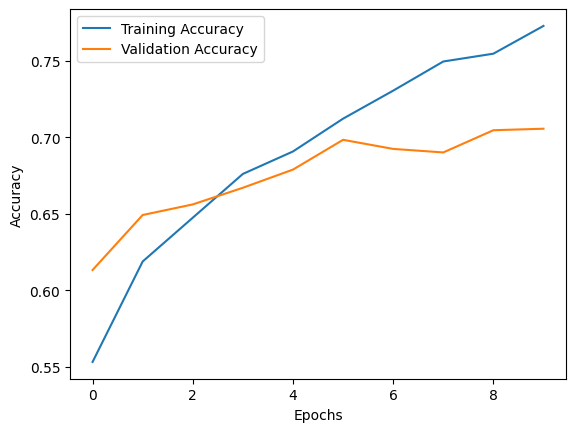

In [13]:
transfer_learning_model.summary()
plt.plot(history_transfer_learning.history['accuracy'], label='Training Accuracy')
plt.plot(history_transfer_learning.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

379/379 ━━━━━━━━━━━━━━━━━━━━ 48s 120ms/step
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      1006
           1       0.80      0.77      0.78      1342
           2       1.00      1.00      1.00      1094
           3       1.00      1.00      1.00      2512
           4       0.81      0.74      0.77      1644
           5       0.91      0.81      0.86      1477
           6       0.75      0.83      0.79      1362
           7       0.83      0.88      0.85      1682

    accuracy                           0.86     12119
   macro avg       0.85      0.86      0.85     12119
weighted avg       0.87      0.86      0.86     12119

Accuracy of the Model: 86.5%




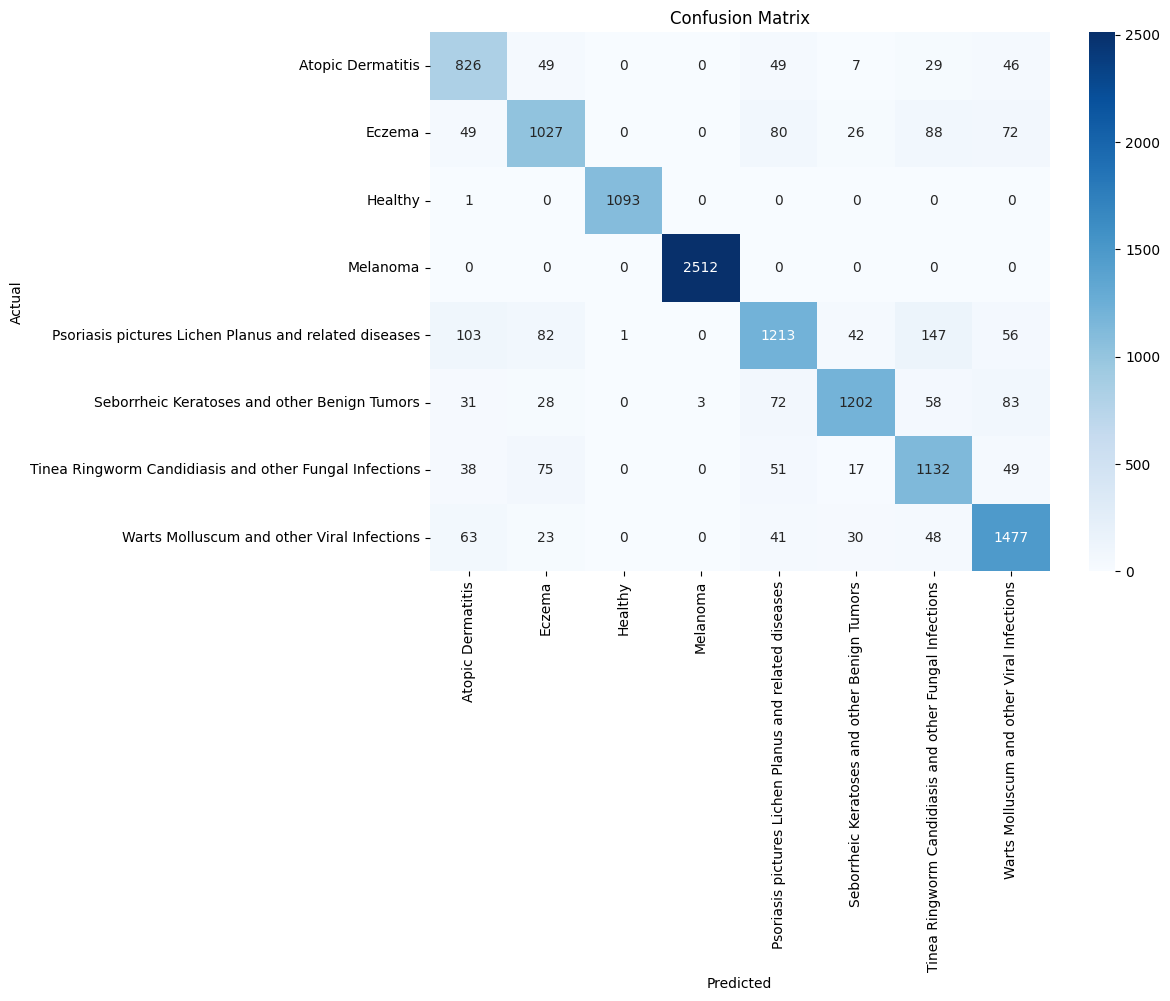

In [14]:
stats_model(transfer_learning_model, train)

95/95 ━━━━━━━━━━━━━━━━━━━━ 12s 124ms/step
              precision    recall  f1-score   support

           0       0.51      0.61      0.56       251
           1       0.54      0.51      0.52       335
           2       0.99      0.99      0.99       274
           3       0.99      1.00      1.00       628
           4       0.58      0.48      0.53       411
           5       0.75      0.63      0.68       370
           6       0.54      0.62      0.58       340
           7       0.59      0.65      0.62       421

    accuracy                           0.71      3030
   macro avg       0.69      0.69      0.68      3030
weighted avg       0.71      0.71      0.71      3030

Accuracy of the Model: 70.6%




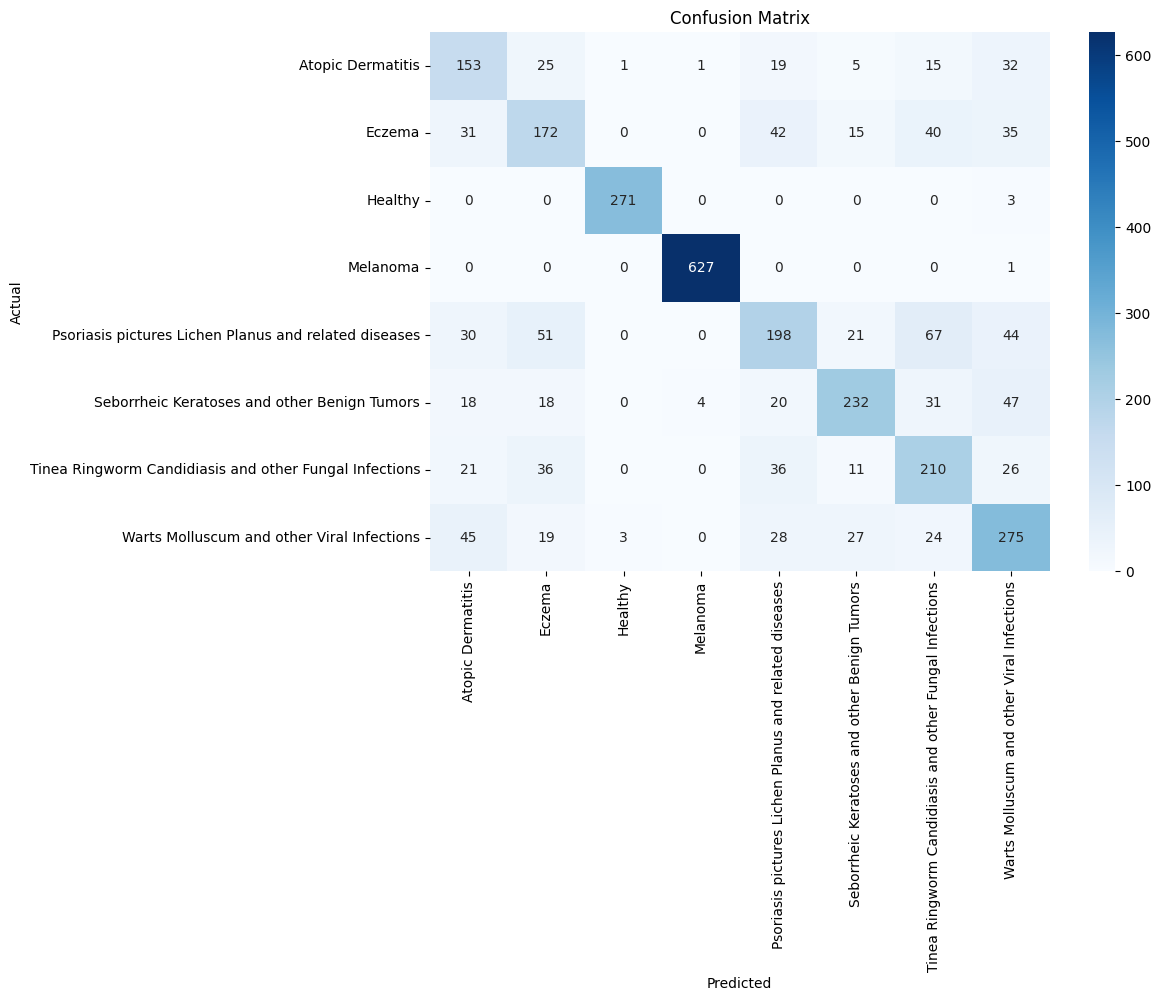

In [15]:
stats_model(transfer_learning_model, val)

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Build the transfer learning model

# Learning rate schedule callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Model checkpoint callback to save the best model based on validation accuracy
model_checkpoint = ModelCheckpoint(
    '/kaggle/working/best_model.keras',           
    monitor='val_accuracy',    
    save_best_only=True,      
    mode='max',               
    verbose=1                 
)

# Train the model for another 10 epochs
history_transfer_learning_2 = transfer_learning_model.fit(
    train,
    epochs=10, 
    validation_data=val,
    callbacks=[reduce_lr, model_checkpoint]  # Include both callbacks
)

# Load the best model
best_model = tf.keras.models.load_model('/kaggle/working/best_model.keras')

# Evaluate on the validation set
test_loss, test_accuracy = best_model.evaluate(val)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/10
378/379 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.7889 - loss: 0.5671
Epoch 1: val_accuracy improved from -inf to 0.70891, saving model to /kaggle/working/best_model.keras
379/379 ━━━━━━━━━━━━━━━━━━━━ 64s 167ms/step - accuracy: 0.7889 - loss: 0.5671 - val_accuracy: 0.7089 - val_loss: 0.8203 - learning_rate: 0.0010
Epoch 2/10
378/379 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.8083 - loss: 0.5079
Epoch 2: val_accuracy improved from 0.70891 to 0.71056, saving model to /kaggle/working/best_model.keras
379/379 ━━━━━━━━━━━━━━━━━━━━ 52s 134ms/step - accuracy: 0.8083 - loss: 0.5080 - val_accuracy: 0.7106 - val_loss: 0.8201 - learning_rate: 0.0010
Epoch 3/10
378/379 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.8162 - loss: 0.4870
Epoch 3: val_accuracy did not improve from 0.71056
379/379 ━━━━━━━━━━━━━━━━━━━━ 51s 131ms/step - accuracy: 0.8162 - loss: 0.4870 - val_accuracy: 0.7089 - val_loss: 0.8277 - learning_rate: 0.0010
Epoch 4/10
378/379 ━━━━━━━━━━━━━━━━━━━━ 0s 105

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 8, 8, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,577,938 (13.65 MB)

 Trainable params: 659,976 (2.52 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 659,978 (2.52 MB)

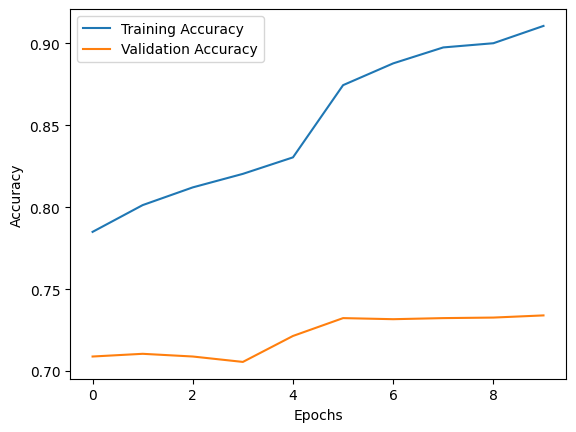

In [24]:
best_model.summary()
plt.plot(history_transfer_learning_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_transfer_learning_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

379/379 ━━━━━━━━━━━━━━━━━━━━ 40s 107ms/step
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1006
           1       0.96      0.94      0.95      1342
           2       1.00      1.00      1.00      1094
           3       1.00      1.00      1.00      2512
           4       0.95      0.95      0.95      1644
           5       0.97      0.98      0.97      1477
           6       0.96      0.96      0.96      1362
           7       0.96      0.98      0.97      1682

    accuracy                           0.97     12119
   macro avg       0.97      0.97      0.97     12119
weighted avg       0.97      0.97      0.97     12119

Accuracy of the Model: 97.0%




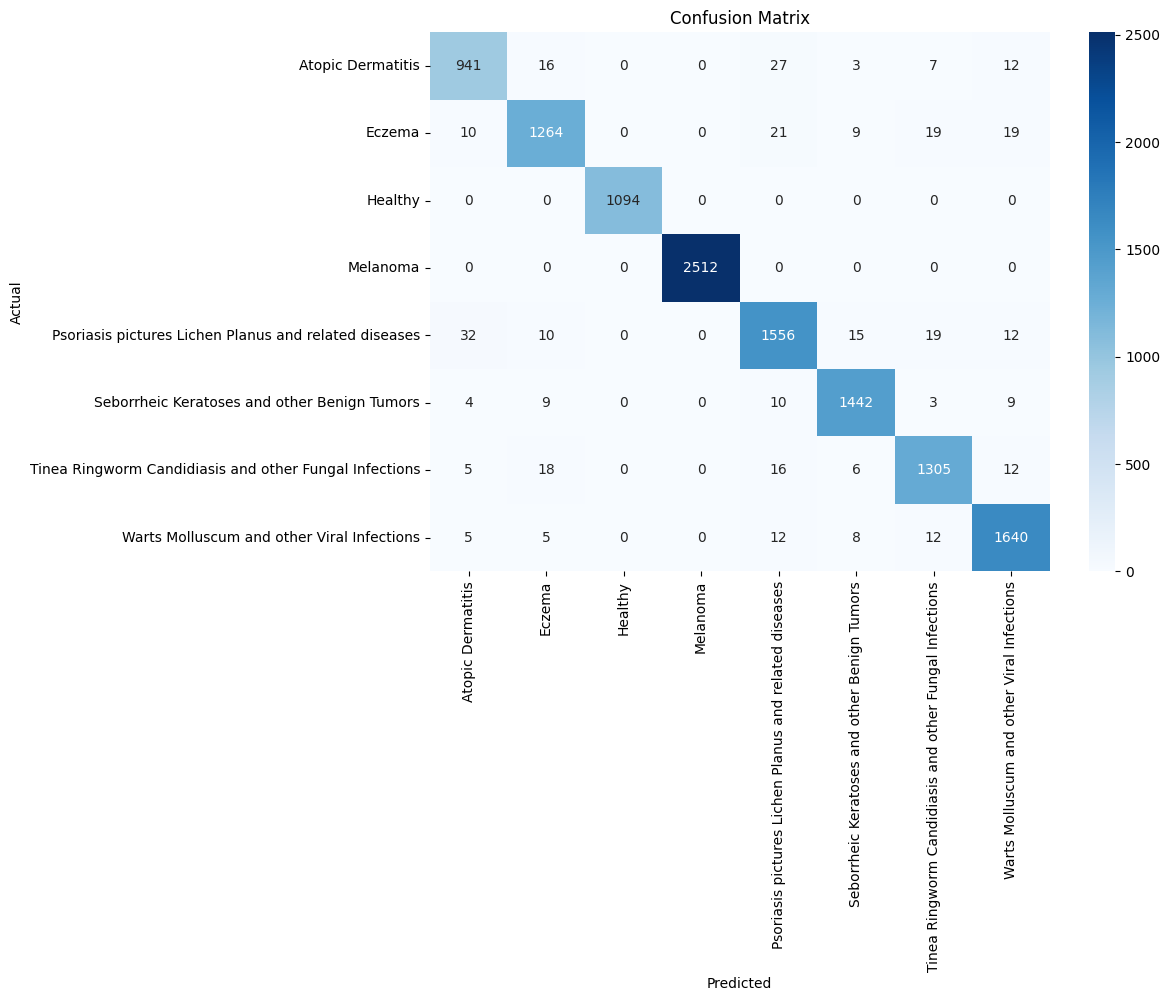

In [32]:
stats_model(best_model, train)

95/95 ━━━━━━━━━━━━━━━━━━━━ 14s 121ms/step
              precision    recall  f1-score   support

           0       0.58      0.57      0.57       251
           1       0.57      0.57      0.57       335
           2       0.97      1.00      0.98       274
           3       0.99      0.99      0.99       628
           4       0.57      0.55      0.56       411
           5       0.72      0.75      0.74       370
           6       0.67      0.61      0.64       340
           7       0.63      0.67      0.65       421

    accuracy                           0.73      3030
   macro avg       0.71      0.71      0.71      3030
weighted avg       0.73      0.73      0.73      3030

Accuracy of the Model: 73.5%




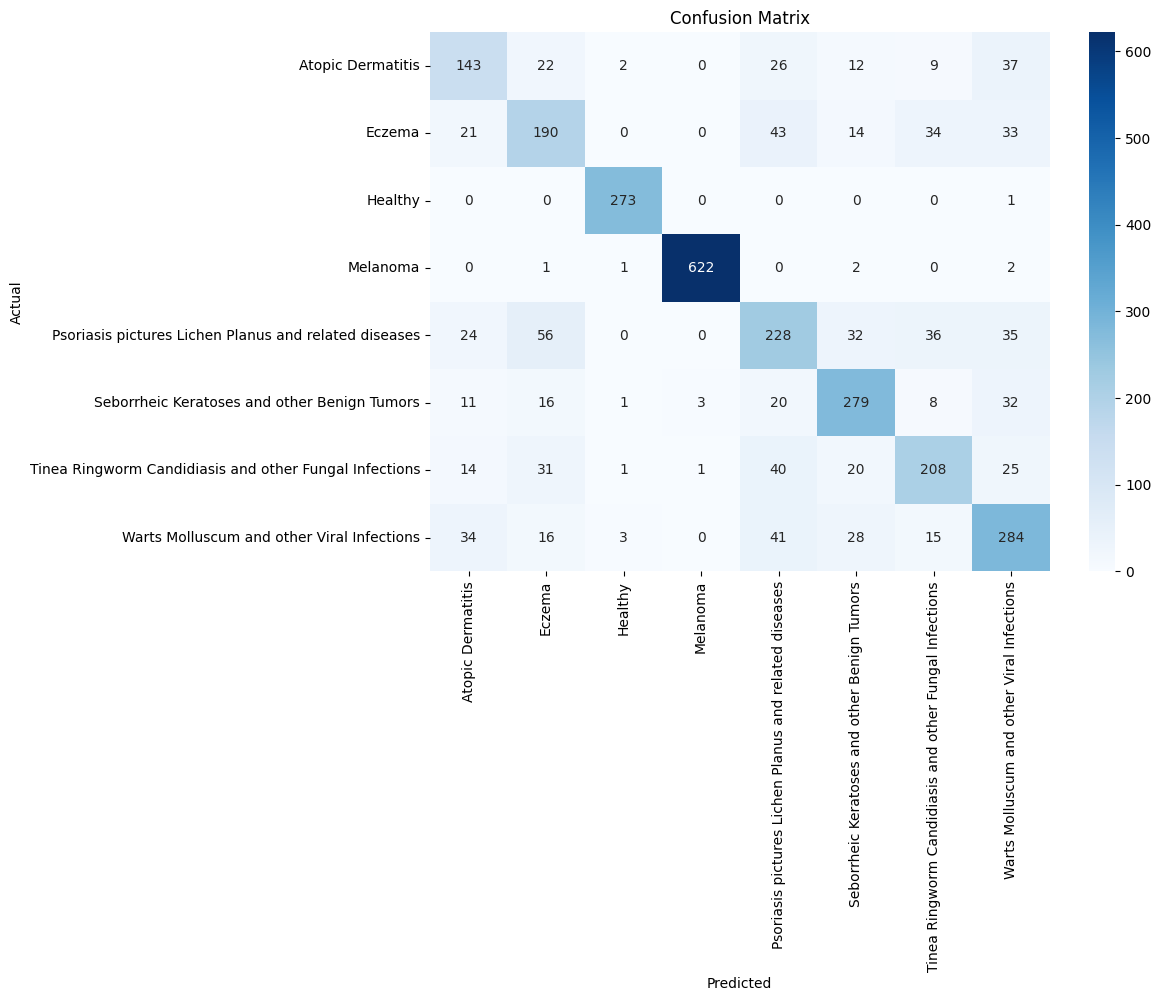

In [31]:
stats_model(best_model, val)

In [27]:
# Train the model for another 5 epochs
history_transfer_learning_3 = transfer_learning_model.fit(
    train,
    epochs=5, 
    validation_data=val,
    callbacks=[reduce_lr, model_checkpoint]  
)

# Load the best model
best_model = tf.keras.models.load_model('/kaggle/working/best_model.keras')

# Evaluate on the validation set
test_loss, test_accuracy = best_model.evaluate(val)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Epoch 1/5
378/379 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9156 - loss: 0.2473
Epoch 1: val_accuracy did not improve from 0.73399
379/379 ━━━━━━━━━━━━━━━━━━━━ 51s 132ms/step - accuracy: 0.9156 - loss: 0.2473 - val_accuracy: 0.7337 - val_loss: 0.8363 - learning_rate: 4.0000e-05
Epoch 2/5
378/379 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9163 - loss: 0.2419
Epoch 2: val_accuracy did not improve from 0.73399
379/379 ━━━━━━━━━━━━━━━━━━━━ 51s 132ms/step - accuracy: 0.9163 - loss: 0.2419 - val_accuracy: 0.7310 - val_loss: 0.8417 - learning_rate: 4.0000e-05
Epoch 3/5
378/379 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.9199 - loss: 0.2371
Epoch 3: val_accuracy improved from 0.73399 to 0.73498, saving model to /kaggle/working/best_model.keras
379/379 ━━━━━━━━━━━━━━━━━━━━ 53s 138ms/step - accuracy: 0.9199 - loss: 0.2372 - val_accuracy: 0.7350 - val_loss: 0.8420 - learning_rate: 4.0000e-05
Epoch 4/5
378/379 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9169 - loss: 0.2395
E

95/95 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step
              precision    recall  f1-score   support

           0       0.58      0.57      0.57       251
           1       0.57      0.57      0.57       335
           2       0.97      1.00      0.98       274
           3       0.99      0.99      0.99       628
           4       0.57      0.55      0.56       411
           5       0.72      0.75      0.74       370
           6       0.67      0.61      0.64       340
           7       0.63      0.67      0.65       421

    accuracy                           0.73      3030
   macro avg       0.71      0.71      0.71      3030
weighted avg       0.73      0.73      0.73      3030

Accuracy of the Model: 73.5%




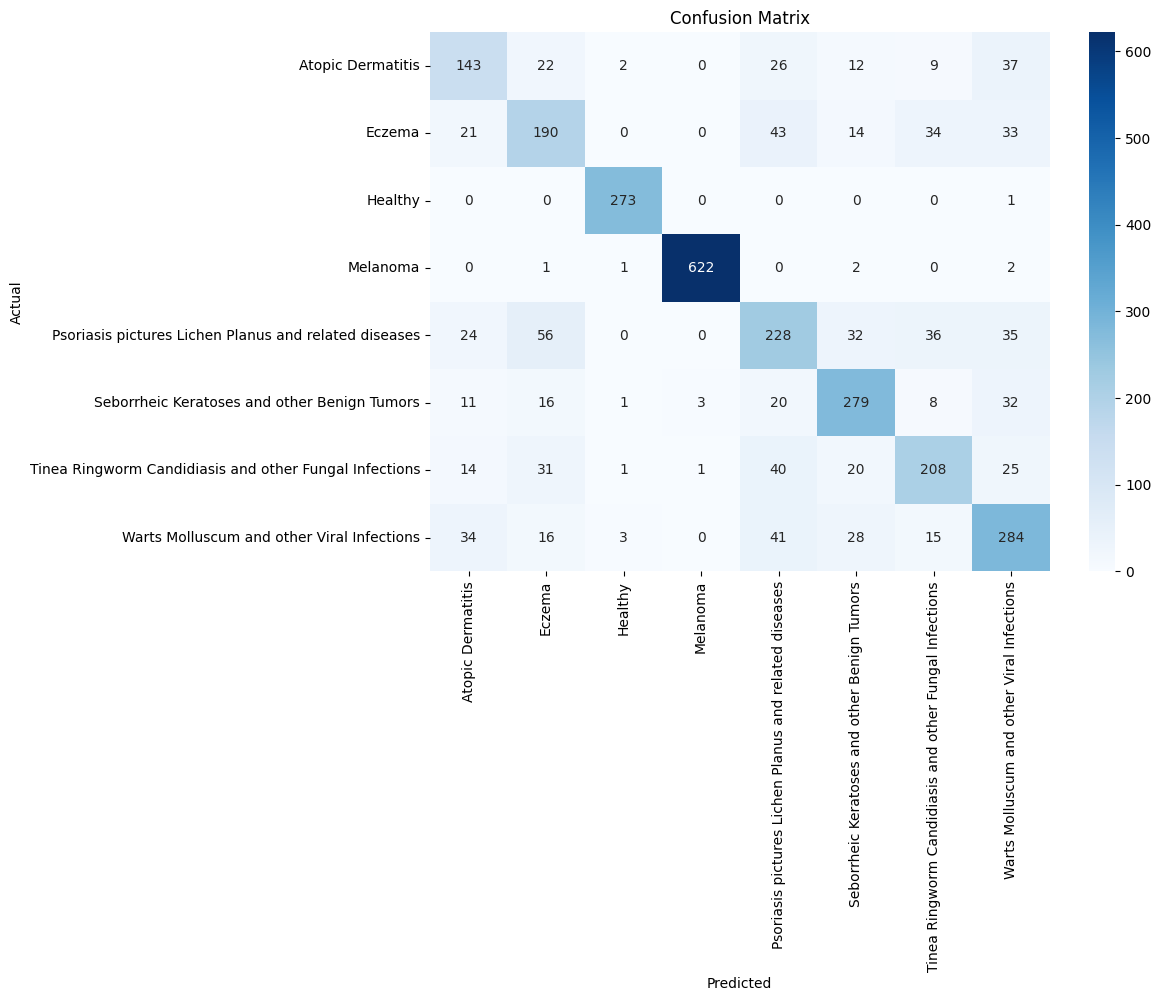

In [34]:
stats_model(best_model, val)

379/379 ━━━━━━━━━━━━━━━━━━━━ 38s 100ms/step
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1006
           1       0.96      0.94      0.95      1342
           2       1.00      1.00      1.00      1094
           3       1.00      1.00      1.00      2512
           4       0.95      0.95      0.95      1644
           5       0.97      0.98      0.97      1477
           6       0.96      0.96      0.96      1362
           7       0.96      0.98      0.97      1682

    accuracy                           0.97     12119
   macro avg       0.97      0.97      0.97     12119
weighted avg       0.97      0.97      0.97     12119

Accuracy of the Model: 97.0%




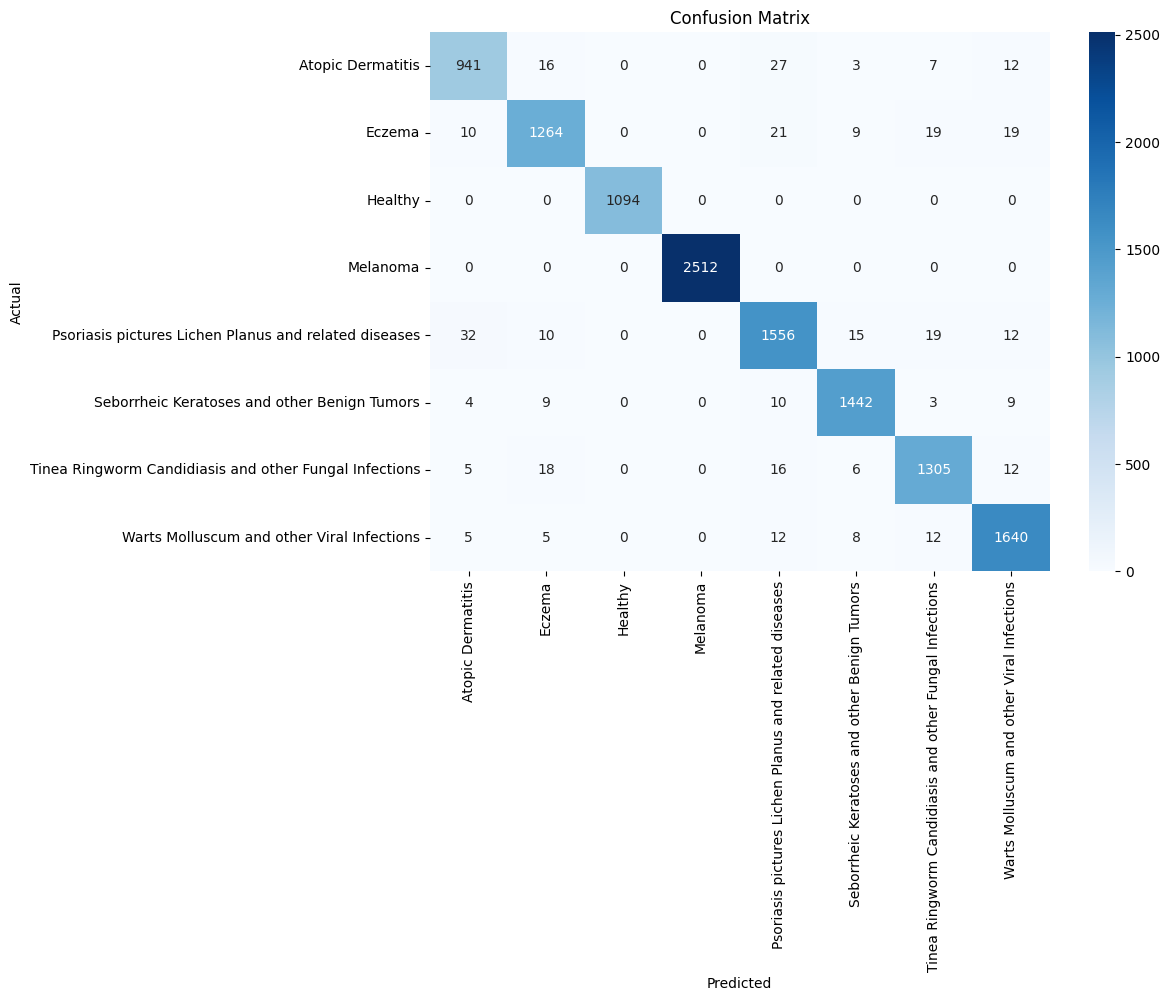

In [33]:
stats_model(best_model, train)

In [30]:
model_h5_path = '/kaggle/working/best_model.keras'  # Path to your .h5 file in the previous directory
model = load_model(model_h5_path)

# Save the model as a .joblib file
joblib_output_path = 'best_model.joblib'  # Change to your desired path or filename
joblib.dump(model, joblib_output_path)

print(f"Model saved as {joblib_output_path}")

Model saved as best_model.joblib


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 8, 8, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,577,938 (13.65 MB)

 Trainable params: 659,976 (2.52 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 659,978 (2.52 MB)

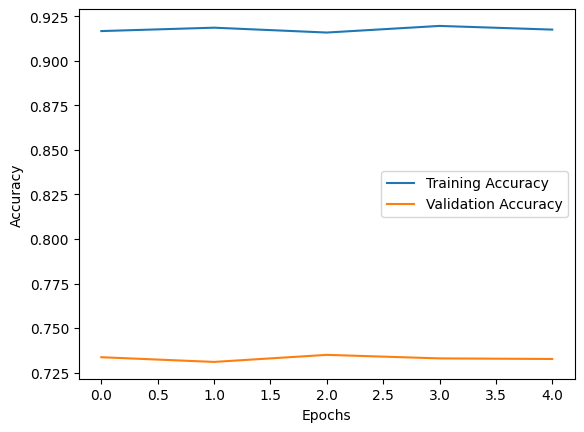

In [36]:
best_model.summary()
plt.plot(history_transfer_learning_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_transfer_learning_3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()